In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd
from skimage.feature import peak_local_max

all_data={}
for j in [200]:
    my_array=np.zeros((250,250,400))
    data03=pd.read_csv("D:Desktop/thesis/results/new_dosetomedium__clear_SFRT_waterphantom"+str(j)+"MeV__1.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
    for i in np.arange(2,20):
        print(i)
        data1=pd.read_csv("D:Desktop/thesis/results/new_dosetomedium__clear_SFRT_waterphantom"+str(j)+"MeV__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
        data03.dose=data03.dose + data1.dose
    data03.dose=data03.dose/(1.60218e-19)*(8.2*10**-9)/19 #######change back to /20 eventually ####################
    for i in np.arange(0,len(data03.dose)):
        my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
    all_data[j]=np.array(my_array)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[12.451864289181357, 3.874931256183922, 5.08191230751233, 7.822884396946919, 6.99414715105285, 13.248441092978908, 17.20409234026242, 10.78994682202151, 18.6432027139621, 19.551264772247084, 19.549125088987616] [31.859320469568146, 32.85804031762288, 32.855213228117286, 31.67673979945244, 30.494753290757103, 25.630065205036885, 24.373164695783657, 21.406961133803577, 21.266055671319855, 19.723818173470814, 22.333916289825815] [22.167754941683516, 30.15145730473509, 29.26028283522097, 25.878283613503996, 25.267878762288333, 14.272509068486471, 8.658727898706827, 11.901141108615427, 3.223889146147443, 0.2144886438988093, 3.4614803181674536]
12.291982930121547 26.770731661341678 15.859808512859486


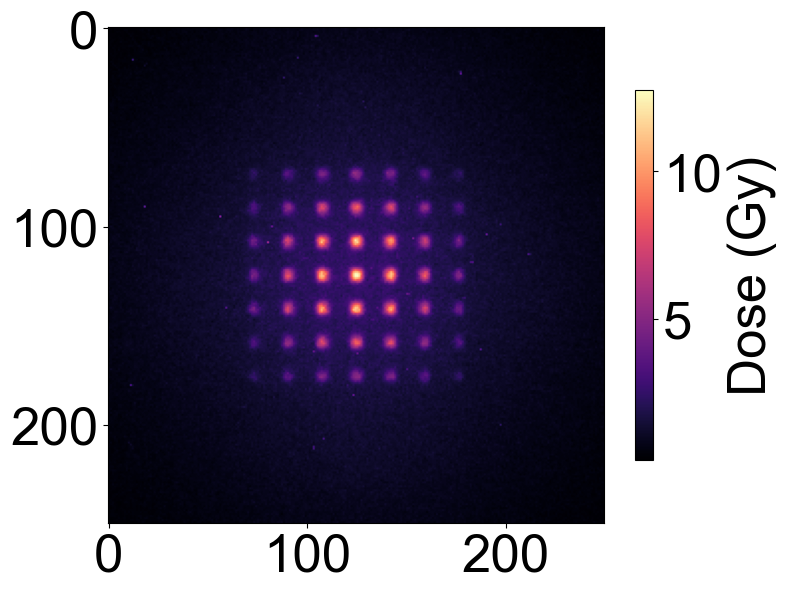

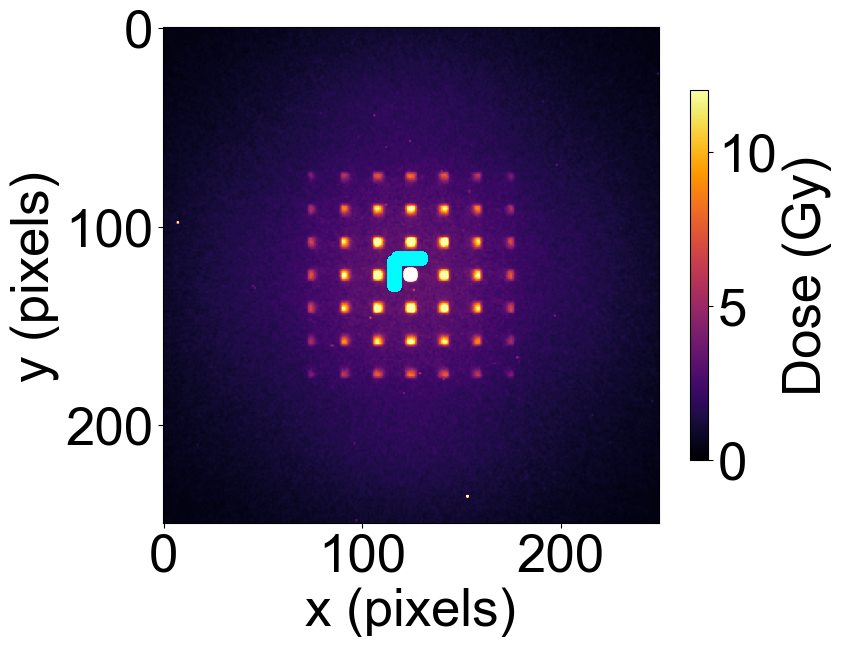

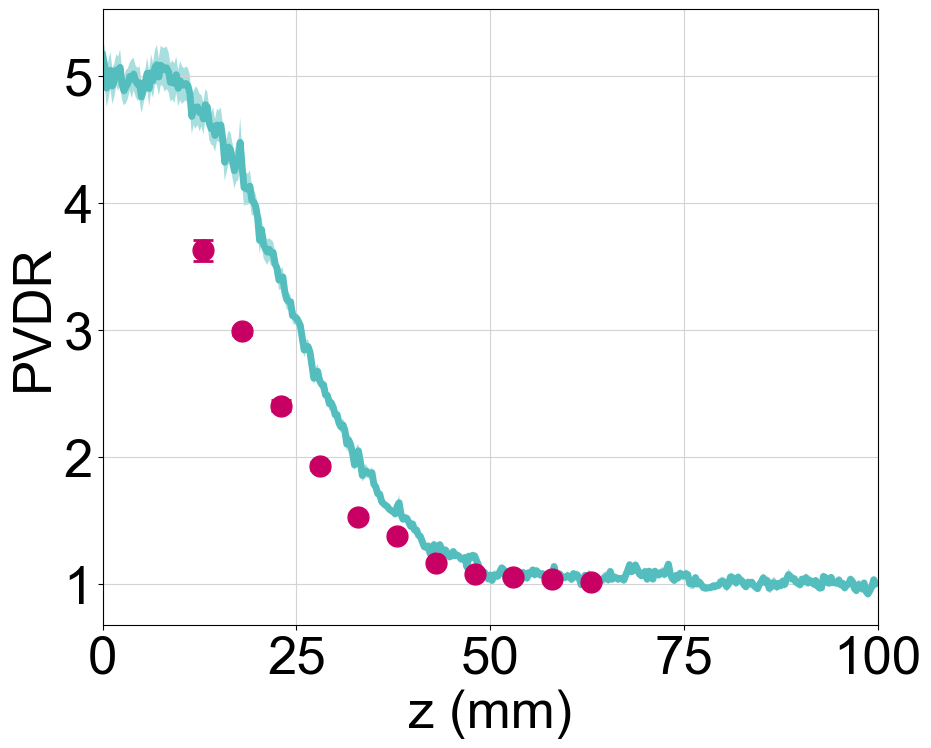

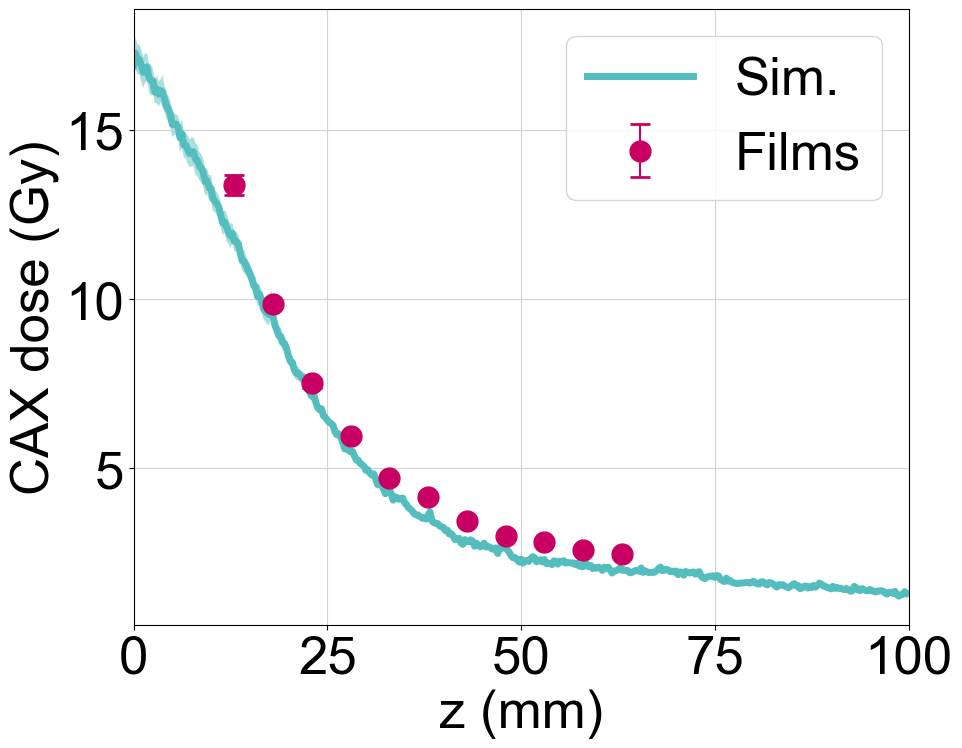

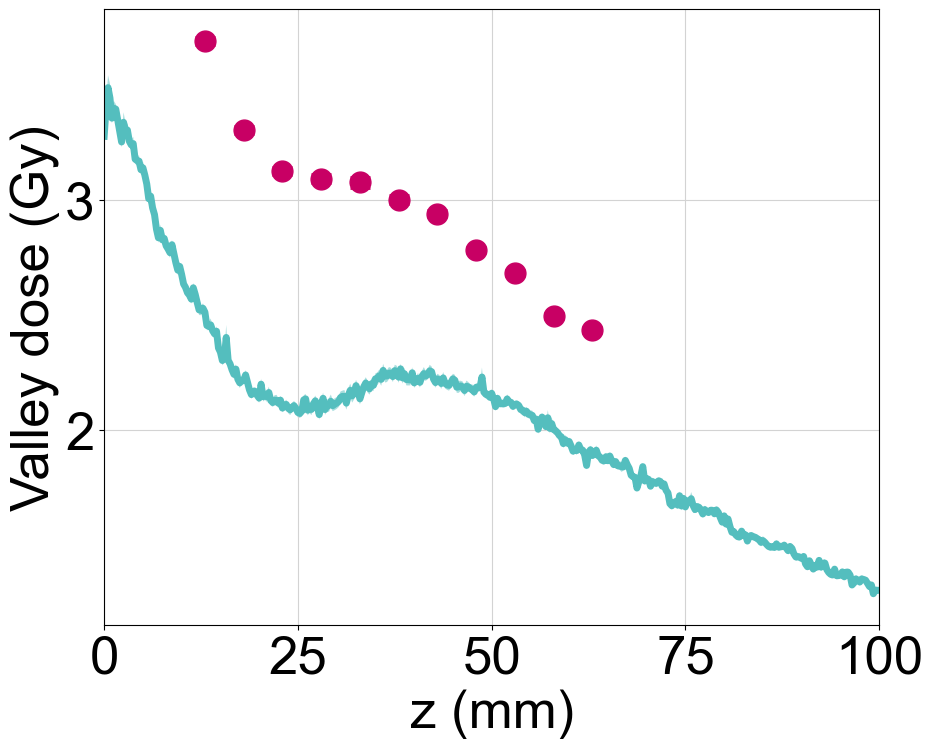

In [5]:
%matplotlib inline
#matplotlib.rc('font', **font)
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["#54bebe","#c80064"])

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 38}

matplotlib.rc('font', **font)


E=200
x=np.arange(0,250)*0.1
y=np.arange(0,250)*0.1
z=(np.arange(0,400)*0.25)
GRID= all_data[E]
GRID=GRID.T
GRID=np.array(GRID)


figure(1,figsize=(8,8))
plt.imshow(GRID[52],cmap='magma')
plt.colorbar(shrink=0.6,label='Dose (Gy)')


peaks=[]
peaks_std=[]
valleys=[]
valleys_std=[]
#Find peak indices
xy = [124,124]
for k in range(len(GRID)):
    #plot 2d profiles
    if k==0:
        figure(k+30,figsize=(8,8))
        profile=GRID[k,xy[1]-100:xy[1]+100,xy[0]-100:xy[0]+100]
        plt.imshow(GRID[k],vmin=0,vmax=12,cmap='inferno')#,extent=(0,len(profile)/300*25.4,0,len(profile)/300*25.4))
        plt.colorbar(shrink=0.6,label='Dose (Gy)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0],alpha=0.4,c='white')
        plt.xlabel('x (pixels)')
        plt.ylabel('y (pixels)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0],alpha=0.4,c='cyan')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0],alpha=0.4,c='cyan')
    #ROIs for peaks and valleys + error
    peaks.append(np.mean([[GRID[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]]))
    peaks_std.append(np.std([GRID[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])/np.sqrt(len([GRID[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])))
    valleysx=np.array([GRID[k,i,j] for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).flatten()
    valleysy=np.array([GRID[k,i,j] for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).flatten()
    valleys.append(np.mean(np.array([valleysx,valleysy]).flatten()))
    valleys_std.append(np.std(np.array([valleysx,valleysy]).flatten())/np.sqrt(len(np.array([valleysx,valleysy]).flatten())))
peaks=np.array(peaks)
peaks_std=np.array(peaks_std)
valleys=np.array(valleys)
valleys_std=np.array(valleys_std)

#pvdr
pvdr=peaks/np.array(valleys)
pvdr_std=np.sqrt((np.array(peaks_std)/np.array(peaks))**2+(np.array(valleys_std)/np.array(valleys))**2)*pvdr




gridfilm=np.load('D:Desktop/thesis/'+str(E)+'MeV.npy',allow_pickle=True)
filmlocs=np.arange(13,63+1,5)
figure(2,figsize=(10,8))
plt.plot(z,pvdr,lw=5,label='Simulation')
plt.fill_between(z,pvdr-pvdr_std,pvdr+pvdr_std,alpha=0.5)
plt.errorbar(filmlocs,gridfilm[5],yerr=gridfilm[6],fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('PVDR')
plt.xlim(0,100)
#plt.legend()
#l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2)

figure(3,figsize=(10,8))
plt.plot(z,peaks,lw=5,label='Sim.')
plt.fill_between(z,peaks-peaks_std,peaks+peaks_std,alpha=0.5)
plt.errorbar(filmlocs,gridfilm[1]*(2.73e-8),yerr=gridfilm[2]*(2.73e-8),fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('CAX dose (Gy)')
plt.legend()
plt.xlim(0,100)

figure(4,figsize=(10,8))
plt.plot(z,valleys,lw=5,label='Simul.')
plt.fill_between(z,valleys-valleys_std,valleys+valleys_std,alpha=0.5)
plt.errorbar(filmlocs,np.array(gridfilm[7])*(2.73e-8),yerr=np.array(gridfilm[8])*(2.73e-8),fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('Valley dose (Gy)')
#plt.legend()
plt.xlim(0,100)

# np.save('D:Desktop/thesis/grid1d_y1.npy',np.mean(GRID[52,124-100:124+100,123:126],axis=1))
# np.save('D:Desktop/thesis/grid1d_y2.npy',np.mean(GRID[252,124-100:124+100,123:126],axis=1))
# np.save('D:Desktop/thesis/grid1d_x1.npy',np.mean(GRID[52,123:126,124-100:124+100],axis=0))
# np.save('D:Desktop/thesis/grid1d_x2.npy',np.mean(GRID[252,123:126,124-100:124+100],axis=0))

# np.save('D:Desktop/thesis/grid1d_x3.npy',np.mean(GRID[132,123:126,124-100:124+100],axis=0))
# np.save('D:Desktop/thesis/grid1d_y3.npy',np.mean(GRID[132,124-100:124+100,123:126],axis=1))

CAXdiff=[]
valdiff=[]
pvdrdiff=[]
for i in np.arange(0,11):
    CAXdiff.append(np.abs((gridfilm[1][i]*(2.73e-8)-peaks[52+i*20])/(gridfilm[1][i]*(2.73e-8))*100))
    valdiff.append(np.abs((gridfilm[7][i]*(2.73e-8)-valleys[52+i*20])/(gridfilm[7][i]*(2.73e-8))*100))
    pvdrdiff.append(np.abs((gridfilm[5][i]-pvdr[52+i*20])/pvdr[52+i*20]*100))
                    
print(CAXdiff,valdiff,pvdrdiff)
print(np.mean(CAXdiff),np.mean(valdiff),np.mean(pvdrdiff))
